In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv('file.tsv',sep='\t',names=['user_id','item_id','rating','timestamp'])
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [3]:
movie = pd.read_csv('Movie_Id_Titles.csv')
movie

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [4]:
movie[movie.item_id==50]

,item_id,title
49,50,Star Wars (1977)


In [5]:
data = pd.merge(df,movie,on='item_id')
data

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [6]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [9]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [11]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['num_of_ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


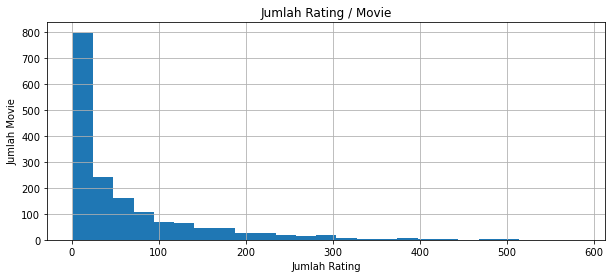

In [13]:
plt.figure(figsize=(10,4))
ratings['num_of_ratings'].hist(bins=25)
plt.title('Jumlah Rating / Movie')
plt.xlabel('Jumlah Rating')
plt.ylabel('Jumlah Movie')
plt.show()

In [14]:
ratings[ratings['num_of_ratings']>450]

,rating,num_of_ratings
title,,
Contact (1997),3.803536,509
"English Patient, The (1996)",3.656965,481
Fargo (1996),4.155512,508
Liar Liar (1997),3.156701,485
Return of the Jedi (1983),4.007890,507
Scream (1996),3.441423,478
Star Wars (1977),4.359589,584
Toy Story (1995),3.878319,452


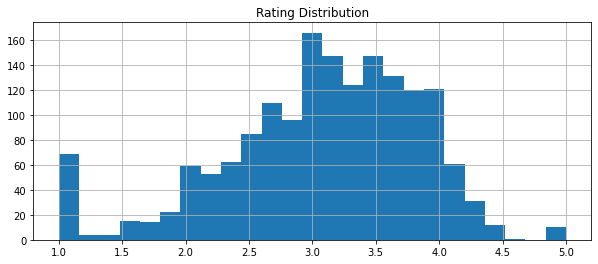

In [15]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=25)
plt.title('Rating Distribution')
plt.show()

In [36]:
moviemat = data.pivot_table(
    index = 'user_id',
    columns = 'title',
    values = 'rating'
).fillna(0)
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
liked_movie = 'Star Wars (1977)'

liked_movie_ratings = moviemat[liked_movie]
liked_movie_ratings

user_id
0      5.0
1      5.0
2      5.0
3      0.0
4      5.0
      ... 
939    0.0
940    4.0
941    0.0
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

## Pearson Correlation Similarity

In [38]:
similar_liked_movie = moviemat.corrwith(liked_movie_ratings)
df_movie_corr = pd.DataFrame(similar_liked_movie,columns=['Pearson_Corr'])
df_movie_corr.dropna(inplace=True)
df_movie_corr.sort_values('Pearson_Corr',ascending=False).head(10)

,Pearson_Corr
title,
Star Wars (1977),1.000000
Return of the Jedi (1983),0.746797
"Empire Strikes Back, The (1980)",0.555233
Raiders of the Lost Ark (1981),0.540455
Indiana Jones and the Last Crusade (1989),0.467523
Toy Story (1995),0.456219
"Terminator, The (1984)",0.437866
Back to the Future (1985),0.419493
Alien (1979),0.412516


In [33]:
similar_liked_movie

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

## Nearest Neighbours

In [24]:
df_movie_pivot = data.pivot_table(
index='item_id',
columns='user_id',
values='rating').fillna(0)
df_movie_pivot

user_id,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
movie_matrix = csr_matrix(df_movie_pivot.values)
model = NearestNeighbors(metric='cosine',algorithm = 'brute')
model.fit(movie_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [32]:
film = 'Batman (1989)'
item_id = int(pd.DataFrame(data['item_id'][data['title']==film]).iloc[0])

distance, idx = model.kneighbors(df_movie_pivot.loc[item_id,:].values.reshape(1,-1),n_neighbors=10)

num=1
for j,i in zip(distance[0], idx[0]):
    if j==0:
        print(f"Rekomendasi Untuk Film {data[data['item_id']==item_id]['title'].iloc[0]}")
    else:
        print(f"{num} : Film ini Berjudul {data[data['item_id']==i]['title'].iloc[0]} dengan distance {j}")
        num+=1

Rekomendasi Untuk Film Batman (1989)
1 : Film ini Berjudul Star Trek IV: The Voyage Home (1986) dengan distance 0.290836250228915
2 : Film ini Berjudul Rob Roy (1995) dengan distance 0.3053461989564902
3 : Film ini Berjudul Hudsucker Proxy, The (1994) dengan distance 0.3126321455063157
4 : Film ini Berjudul Glengarry Glen Ross (1992) dengan distance 0.31983252759281455
5 : Film ini Berjudul 101 Dalmatians (1996) dengan distance 0.33024592599604097
6 : Film ini Berjudul Wes Craven's New Nightmare (1994) dengan distance 0.33463389167836677
7 : Film ini Berjudul Naked Gun 33 1/3: The Final Insult (1994) dengan distance 0.33560720799637955
8 : Film ini Berjudul Apollo 13 (1995) dengan distance 0.3436320608215734
9 : Film ini Berjudul This Is Spinal Tap (1984) dengan distance 0.3509174945485136
